<a href="https://colab.research.google.com/github/SoheliPaul/Deep-Learning/blob/main/DL_Lab5_561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
import scipy as sp
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras import backend as K
from sklearn.metrics import confusion_matrix
import tensorflow.keras.applications.inception_v3 as inception_v3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Preparation**

---

1. Acquire a dataset comprising images of animals from various species, categorized into the five specified classes.

In [ ]:
base_path = '/content/drive/MyDrive/DATASETS/Lab5_dl'
cat_path = os.path.join(base_path, 'cat')
dog_path = os.path.join(base_path, 'dog')
parrot_path = os.path.join(base_path, 'parrot')
snake_path = os.path.join(base_path, 'snake')
whale_path = os.path.join(base_path, 'whale')

In [ ]:
print("Files in 'cat' folder:", os.listdir(cat_path))
print("Files in 'dog' folder:", os.listdir(dog_path))
print("Files in 'parrot' folder:", os.listdir(parrot_path))
print("Files in 'snake' folder:", os.listdir(snake_path))
print("Files in 'whale' folder:", os.listdir(whale_path))

Files in 'cat' folder: ['578d493138.jpg', '34fb30ecc5.jpg', '0b54dde5f5.jpg', '11883c3dd8.jpg', '2d7dc1ddb5.jpg', '00357563a7.jpg', '3321ec48a8.jpg', '3f3a2aaef2.jpg', '124eecb74f.jpg', '39ae72da61.jpg', '32cd00f171.jpg', '4815f8dfaa.jpg', '087d293433.jpg', '1f016e1910.jpg', '15b23c04b7.jpg', '094ac674a9.jpg', '354bb2acdf.jpg', '4c6ff6dae0.jpg', '029c926ce9.jpg', '4bd8b7789f.jpg', '2a40de8365.jpg', '31ae8d36b6.jpg', '0c3d04bcf5.jpg', '0cfaf08fce.jpg', '0d0d6d90d8.jpg', '46af339620.jpg', '057e6db146.jpg', '1a2dce7848.jpg', '8af49688fa.jpg', '7f923c6676.jpg', '98470f6918.jpg', '8d88a86d91.jpg', '81b58d7d07.jpg', '9293137b5d.jpg', '6fe978c917.jpg', '730d6a8791.jpg', '71c2375c64.jpg', '72c56919f9.jpg', '68a2e3af59.jpg', '71756f7bd0.jpg', '67dc417509.jpg', '9fd544a838.jpg', '5aaea25f27.jpg', '6a5e9eac29.jpg', '76273ddb00.jpg', '612c521481.jpg', '5a5cdbdc6b.jpg', '66548aefad.jpg', '5e07a0666d.jpg', '84db062d1f.jpg', '6128bd1a84.jpg', '77dee19720.jpg', '78359cbe21.jpg', '6296ca5ccf.jpg', '9d2

**Inpur Augmentation**

---

1. Preprocess the images by resizing them to a uniform size, applying normalization, and partitioning them into training, validation, and test sets.
2. Implement input augmentation techniques, such as random rotations, translations, flips, and changes in scale or brightness, to augment the training dataset and enhance the model's ability to generalize.

In [ ]:
train = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,brightness_range=[1.0,2.0],rotation_range=20,validation_split=0.2)
validation = ImageDataGenerator(rescale=1/255, validation_split=0.2)
test = ImageDataGenerator(rescale = 1/255,validation_split=0.2)
train_generator = train.flow_from_directory(base_path,target_size=(150, 150),batch_size=32,class_mode='categorical',subset='training')
validation_generator = validation.flow_from_directory(base_path,target_size=(150, 150),batch_size=32,class_mode='categorical',subset='validation')
test_generator = test.flow_from_directory(base_path,target_size=(150,150),batch_size=32,class_mode = 'categorical',shuffle=False)
print("Class indices:")
print(train_generator.class_indices)

Found 240 images belonging to 5 classes.
Found 60 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Class indices:
{'cat': 0, 'dog': 1, 'parrot': 2, 'snake': 3, 'whale': 4}


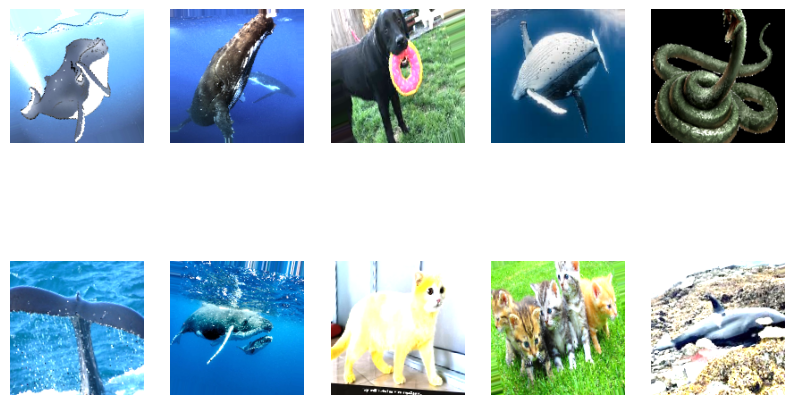

In [ ]:
#Visualize some of the augmented images
x_batch, y_batch = next(train_generator)
fig, axs = plt.subplots(2, 5,figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_batch[i])
    ax.axis('off')
plt.show()

**Model Architecture**

---

1. Devise a CNN architecture tailored for image classification tasks, incorporating convolutional layers, pooling layers, fully connected layers, and suitable activation functions.

2. Embed batch normalization layers after convolutional layers to expedite model convergence and improve performance.

3. Train the CNN model using an appropriate optimizer (e.g., Adam) and a relevant loss function (e.g., categorical cross-entropy).

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Conv2D(32, (2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_6 (Bat  (None, 148, 148, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        2080      
                                                                 
 batch_normalization_7 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                      

**Training Strategy**

---
1. Monitor the training process by tracking essential metrics like training and validation accuracy, loss, and any other pertinent metrics.

In [ ]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples //32,epochs=100,validation_data=validation_generator,validation_steps=validation_generator.samples //32)
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Epoch 1/100
7/7 [==============================] - 69s 9s/step - loss: 4.5281 - accuracy: 0.3654 - val_loss: 1.5929 - val_accuracy: 0.1875
Epoch 2/100
7/7 [==============================] - 4s 550ms/step - loss: 2.0382 - accuracy: 0.5673 - val_loss: 1.6075 - val_accuracy: 0.2188
Epoch 3/100
7/7 [==============================] - 4s 578ms/step - loss: 1.1228 - accuracy: 0.6538 - val_loss: 1.7613 - val_accuracy: 0.2188
Epoch 4/100
7/7 [==============================] - 4s 602ms/step - loss: 0.9015 - accuracy: 0.7019 - val_loss: 2.0882 - val_accuracy: 0.2188
Epoch 5/100
7/7 [==============================] - 4s 532ms/step - loss: 0.5531 - accuracy: 0.7933 - val_loss: 2.5973 - val_accuracy: 0.2500
Epoch 6/100
7/7 [==============================] - 5s 746ms/step - loss: 0.4957 - accuracy: 0.8317 - val_loss: 2.8723 - val_accuracy: 0.2500
Epoch 7/100
7/7 [==============================] - 4s 591ms/step - loss: 0.3163 - accuracy: 0.8894 - val_loss: 2.5684 - val_accuracy: 0.3438
Epoch 8/100
7/7

**Predictions**

In [ ]:
test_generator

It's a cat


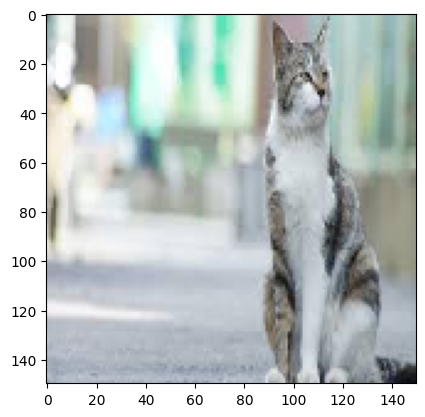

In [ ]:
x_batch, y_batch = next(test_generator)
list = [*range(1, 10, 1)]
a = random.choice(list)
plt.imshow(x_batch[a])
pred = test_generator.labels[a]
if pred == 0:
  print("It's a cat")
elif pred == 1:
  print("It's a dog")
elif pred == 2:
  print("It's a parrot")
elif pred == 3:
  print("It's a snake")
else:
  print("It's a whale")

It's a dog


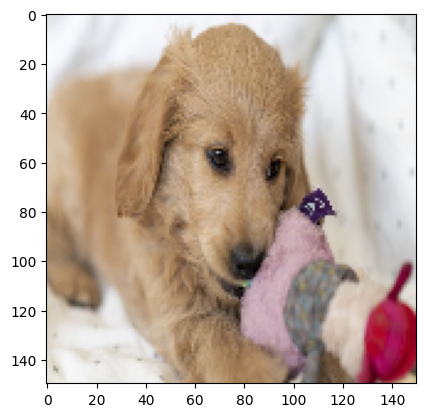

In [ ]:
x_batch, y_batch = next(test_generator)
list = [*range(1, 10, 1)]
a = random.choice(list)
plt.imshow(x_batch[a])
pred = test_generator.labels[a]
if pred == 0:
  print("It's a dog")
elif pred == 1:
  print("It's a cat")
elif pred == 2:
  print("It's a parrot")
elif pred == 3:
  print("It's a snake")
else:
  print("It's a whale")

It's a whale


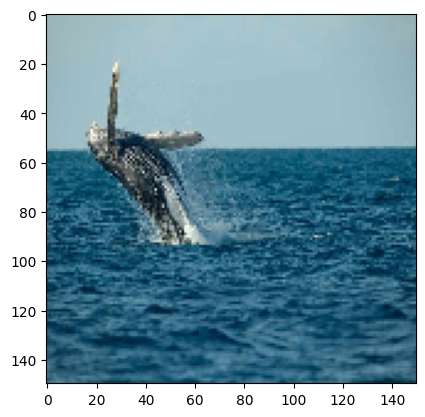

In [ ]:
x_batch, y_batch = next(test_generator)
list = [*range(1, 10, 1)]
a = random.choice(list)
plt.imshow(x_batch[a])
pred = test_generator.labels[a]
if pred == 0:
  print("It's a whale")
elif pred == 1:
  print("It's a dog")
elif pred == 2:
  print("It's a cat")
elif pred == 3:
  print("It's a snake")
else:
  print("It's a parrot")

In [ ]:
y_pred = np.argmax(model.predict(test_generator), axis=-1)

10/10 [==============================] - 3s 262ms/step


In [ ]:
image_indices = [index for index in range(len(test_generator.labels))]

classes = dict(zip(test_generator.class_indices.values(), test_generator.class_indices.keys()))

# Create a DataFrame with predictions
Predictions = pd.DataFrame({
    "Image Index": image_indices,
    "Test Labels": test_generator.labels,
    "Test Classes": [classes[i] for i in test_generator.labels],
    "Prediction Labels": y_pred,
    "Prediction Classes": [classes[i] for i in y_pred],
    "Path": test_generator.filenames,
    "Prediction Probability": [x for x in np.asarray(tf.reduce_max(model.predict(test_generator), axis=1))]
})

10/10 [==============================] - 3s 319ms/step


In [ ]:
Predictions.sample(10)

,Image Index,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
198,198,3,snake,3,snake,snake/2c76f7d316.jpg,1.000000
137,137,2,parrot,2,parrot,parrot/34f9668c8e.jpg,0.999062
111,111,1,dog,1,dog,dog/89af0e8454.jpg,0.917324
240,240,4,whale,4,whale,whale/021de89c47.jpg,1.000000
168,168,2,parrot,2,parrot,parrot/7d5cb5f5fa.jpg,0.999999
171,171,2,parrot,2,parrot,parrot/87bc6bdcd7.jpg,0.999993
70,70,1,dog,1,dog,dog/17f6784a37.jpg,0.999145
295,295,4,whale,4,whale,whale/8e88817cc7.jpg,1.000000
75,75,1,dog,3,snake,dog/26c7056eda.jpg,0.984431
23,23,0,cat,0,cat,cat/46af339620.jpg,0.977615


**Visualization**

---

1. Utilize visualization tools such as TensorBoard or equivalent libraries to visualize the CNN model's architecture and parameters.
2. Create visualizations, such as training/validation accuracy and loss curves, confusion matrices, and class activation maps, to facilitate the interpretation of model predictions and evaluation of performance.

**Training/Validation Accuracy and Loss Curves**

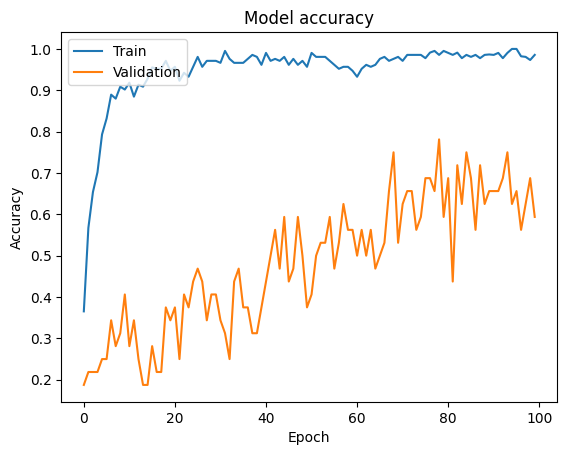

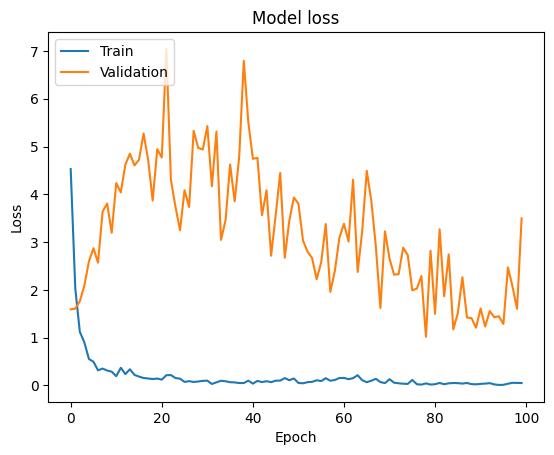

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Confusion Matrix**

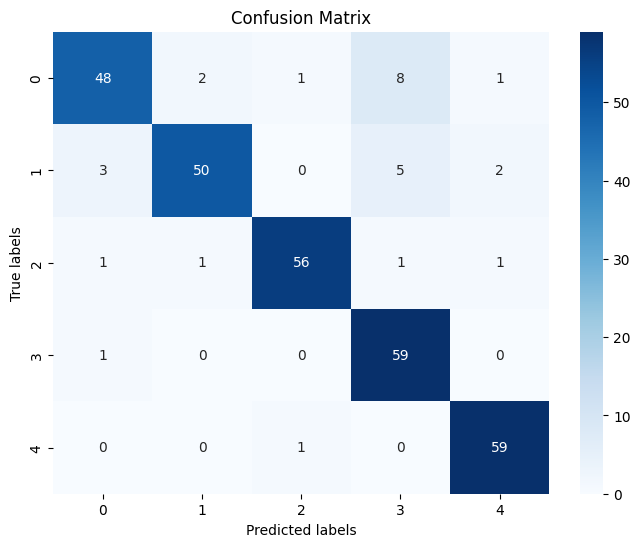

In [ ]:
y_true = test_generator.classes
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Class Activation Maps**

---

Class Activation Maps (CAM) is a powerful technique used in Computer Vision for classification tasks. It allows the scientist to inspect the image to be categorized and understand which parts/pixels of that image have contributed more to the final output of the model.

In [ ]:
IMG_NAME = '/content/drive/MyDrive/DATASETS/Lab5_dl/parrot/080a286cf3.jpg'
img = plt.imread(IMG_NAME)

In [ ]:
x = cv2.resize(img, (150,150))
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)

In [ ]:
last_conv_layer = model.get_layer('conv2d_6')
model_fm = tf.keras.Model(inputs=model.inputs,outputs=[model.output,last_conv_layer.output])

In [ ]:
model_out, feature_maps = model_fm.predict(x)
feature_maps = np.squeeze(feature_maps)
model_out = np.squeeze(model_out)

print(model_out.shape)
print(feature_maps.shape)

1/1 [==============================] - 0s 270ms/step
(5,)
(34, 34, 128)


In [ ]:
# get weights of last layer
weights = model.layers[-1].weights[0]
print(weights.shape)
max_idx = np.argmax( model_out )
print(f"Max index: {max_idx} ({model_out[max_idx]*100:.2f}%)")

(128, 5)
Max index: 4 (23.95%)


In [ ]:
winning_weights = weights[:, max_idx]
print(winning_weights.shape)

(128,)


In [ ]:
CAM = np.zeros(feature_maps.shape[:2])
for k, wk in enumerate(winning_weights):
    # get feature map k
    feature_map_k = feature_maps[..., k]

    # get activation of map k (multiply Fk with wk)
    activation_k = feature_map_k * wk

    CAM += activation_k

In [ ]:
CAM = np.sum(feature_maps * winning_weights, axis=2)

<Axes: >

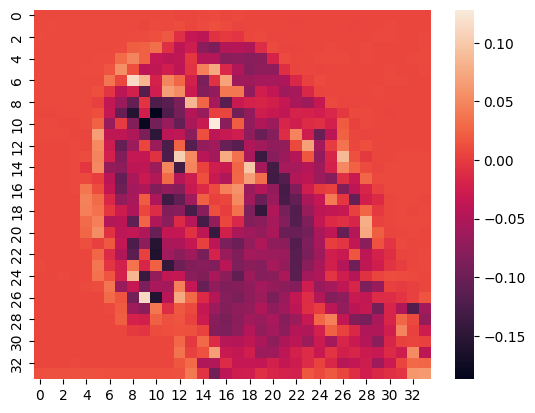

In [ ]:
sns.heatmap(CAM)

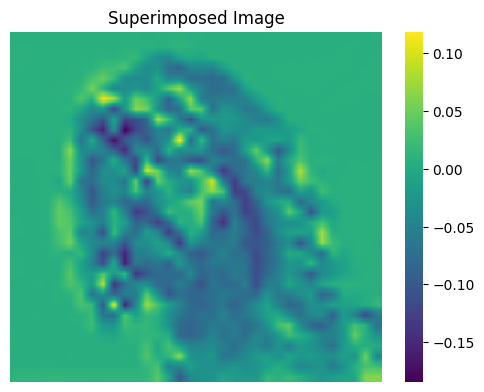

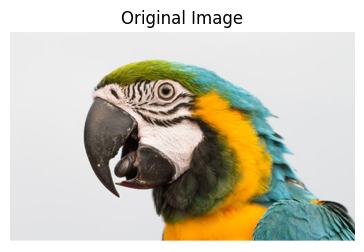

In [ ]:
heatmap = cv2.resize(CAM, (img.shape[1], img.shape[0]))
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.title("Superimposed Image")
sns.heatmap(heatmap,cmap='viridis')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")
plt.show()